In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dask.diagnostics import ProgressBar

## Importació del Tracking com a Dask Dataframes

In [2]:
path = os.path.join('..', 'data', 'final')


In [3]:
with ProgressBar():
    tracking_test = dd.read_parquet(os.path.join(path ,'tracking_9_weeks_test'), dtypes = {"nflId" : "int64"})
    tracking_train = dd.read_parquet(os.path.join(path ,'tracking_9_weeks_train'), dtypes = {"nflId" : "int64"})
    tracking = dd.concat([tracking_test, tracking_test], dtypes = {"nflId" : "int64"})
    print(f"Hi ha {len(tracking)} registres amb {tracking.shape[1]} columnes")    

[########################################] | 100% Completed | 109.28 ms
Hi ha 15657848 registres amb 12 columnes


In [4]:
print(tracking.dtypes)

gameId       int64
playId       int64
nflId      float64
frameId      int64
x          float64
y          float64
s          float64
a          float64
dis        float64
o          float64
dir        float64
Y            int64
dtype: object


In [5]:
with ProgressBar():
    max_frame = tracking.groupby(by=['gameId', 'playId'])['frameId'].max().compute()
    print(f"Mínim de frames per jugada: {max_frame.min()}")
    print(f"Màxim de frames per jugada: {max_frame.max()}")

[########################################] | 100% Completed | 2.36 sms
Mínim de frames per jugada: 1
Màxim de frames per jugada: 490


In [6]:
frames = max_frame.value_counts().sort_index().index
cantidad_frames = max_frame.value_counts().sort_index().values
print(frames[47])
print(cantidad_frames[47])

49
47


<Axes: xlabel='frameId'>

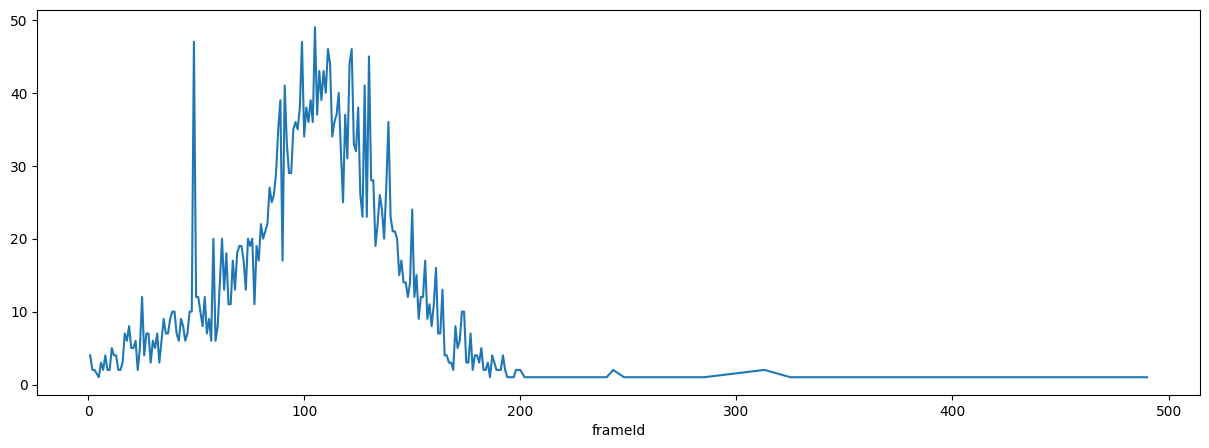

In [7]:
max_frame.value_counts().sort_index().plot(kind='line', figsize=(15, 5))

In [8]:
tracking[(tracking['gameId'] == 2022092506) & (tracking['playId'] == 2132)].compute()

,gameId,playId,nflId,frameId,x,y,s,a,dis,o,dir,Y
72910,2022092506,2132,33099.0,1,0.908106,0.381296,-0.685689,-0.770177,-0.614078,0.933920,-1.258607,1
72911,2022092506,2132,42371.0,1,0.775872,0.146121,-0.408240,-0.054810,-0.354935,0.849500,-0.261048,1
72912,2022092506,2132,43299.0,1,0.541920,-2.284022,-0.056094,0.089967,-0.095791,-1.397253,0.510459,1
72913,2022092506,2132,43350.0,1,0.306341,1.110339,-0.493609,-0.463591,-0.458592,-0.865020,-1.319788,1
72914,2022092506,2132,43433.0,1,0.732744,0.361698,-0.621662,0.166613,-0.614078,0.998361,-0.806599,1
72915,2022092506,2132,43586.0,1,0.779941,-0.059004,-0.605656,0.081450,-0.614078,0.795918,-0.367133,1
72916,2022092506,2132,43641.0,1,0.644452,-1.112066,-0.701696,-0.744629,-0.665907,-1.162845,1.401072,1
72917,2022092506,2132,44817.0,1,0.780348,1.619885,-0.675018,-0.727596,-0.614078,0.881670,0.663554,1
72918,2022092506,2132,44872.0,1,0.384460,1.873351,-0.621662,-0.710563,-0.614078,-0.637066,0.307098,1
72919,2022092506,2132,46123.0,1,0.082154,-0.018502,-0.525622,-0.642433,-0.510421,-0.776809,0.591171,1


In [32]:
# Número de passades i carreres en jugades d'un sol frame
oneFrame = max_frame[max_frame == 1]
tracking.loc[tracking['gameId'].isin(oneFrame.index.get_level_values(0)) & tracking['playId'].isin(oneFrame.index.get_level_values(1))][["playId", "gameId","Y"]].compute()

,playId,gameId,Y
14904,1132,2022091901,1
14905,1132,2022091901,1
14906,1132,2022091901,1
14907,1132,2022091901,1
14908,1132,2022091901,1
...,...,...,...
16931,2388,2022101607,0
16932,2388,2022101607,0
16933,2388,2022101607,0
16934,2388,2022101607,0


In [9]:
# Número de jugades totals
with ProgressBar():
    print(f"Número de jugades: {tracking['playId'].unique().count().compute()}")
    print(f"Número de partits: {tracking['gameId'].unique().count().compute()}")

[########################################] | 100% Completed | 1.52 sms
Número de jugades: 2266
[########################################] | 100% Completed | 1.48 sms
Número de partits: 136


In [10]:
tracking.head()

,gameId,playId,nflId,frameId,x,y,s,a,dis,o,dir,Y
0,2022091200,64,35459.0,1,-0.380054,0.224512,-0.338878,-0.480624,-0.354935,0.686295,-1.071427,0
1,2022091200,64,35459.0,2,-0.377206,0.227125,-0.344214,-0.489140,-0.354935,0.678509,-1.043949,0
2,2022091200,64,35459.0,3,-0.374358,0.229739,-0.354885,-0.599852,-0.354935,0.668674,-1.056491,0
3,2022091200,64,35459.0,4,-0.371917,0.233658,-0.365556,-0.608368,-0.354935,0.668674,-1.074874,0
4,2022091200,64,35459.0,5,-0.369476,0.237578,-0.376227,-0.506173,-0.354935,0.681890,-1.124182,0


##### Número de valors nuls al Tracking

In [11]:
valors_null = tracking.isnull().sum()

with ProgressBar():
    percentatge = ((valors_null / tracking.index.size) * 100).compute()
print(percentatge)

[########################################] | 100% Completed | 4.16 sms
gameId     0.0
playId     0.0
nflId      0.0
frameId    0.0
x          0.0
y          0.0
s          0.0
a          0.0
dis        0.0
o          0.0
dir        0.0
Y          0.0
dtype: float64


In [12]:
with ProgressBar():
    print(tracking.describe(include = 'all').compute())

[########################################] | 100% Completed | 32.74 s
             gameId        playId         nflId       frameId             x  \
count  1.565785e+07  1.565785e+07  1.565785e+07  1.565785e+07  1.565785e+07   
mean   2.022099e+09  1.955024e+03  4.536170e+04  6.145078e+01 -5.623741e-03   
std    5.994143e+03  1.194363e+03  1.090348e+04  4.425448e+01  9.826212e-01   
min    2.022091e+09  5.400000e+01  0.000000e+00  1.000000e+00 -2.349727e+00   
25%    2.022093e+09  1.334000e+03  4.500900e+04  3.600000e+01 -3.894123e-01   
50%    2.022101e+09  2.463000e+03  4.795200e+04  7.200000e+01  3.946322e-01   
75%    2.022102e+09  3.473000e+03  5.349400e+04  1.220000e+02  1.360956e+00   
max    2.022111e+09  4.947000e+03  5.524100e+04  4.900000e+02  2.285779e+00   

                  y             s             a           dis             o  \
count  1.565785e+07  1.565785e+07  1.565785e+07  1.565785e+07  1.565785e+07   
mean  -5.363592e-03 -4.402627e-01 -4.488590e-01 -4.310460e-0

In [14]:
tracking[tracking['y'] < -1]["playId"].unique().count().compute()

np.int64(7)

## Importació de Players_plays i Plays

In [3]:
player_plays_test = pd.read_csv(os.path.join(path, "player_plays_test.csv"))
player_plays_train = pd.read_csv(os.path.join(path, "player_plays_train.csv"))
player_plays = pd.concat([player_plays_test, player_plays_train], ignore_index=True)

plays_test = pd.read_csv(os.path.join(path, "plays_test.csv"))
plays_train = pd.read_csv(os.path.join(path, "plays_train.csv"))
plays = pd.concat([plays_test, plays_train], ignore_index=True)


### Set de Player Plays

In [4]:
player_plays.describe()

,gameId,playId,nflId,isOffense,isDefense,isBall,imc,is_Quarterback,is_RunningBack,is_Receiver,is_TightEnd,is_OffensiveLine,is_DefensiveLine,is_Linebacker,is_DefensiveBack,Y
count,3.547270e+05,354727.000000,354727.000000,354727.000000,354727.000000,354727.0,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000,354727.000000
mean,2.022099e+09,2023.833091,47437.201033,0.500001,0.499999,0.0,31.494483,0.045711,0.051090,0.115413,0.059189,0.228576,0.141362,0.138721,0.219938,0.603822
std,5.979081e+03,1182.056487,5167.218156,0.500001,0.500001,0.0,4.807816,0.208858,0.220182,0.319520,0.235979,0.419916,0.348395,0.345655,0.414205,0.489103
min,2.022091e+09,54.000000,25511.000000,0.000000,0.000000,0.0,21.768885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.022093e+09,996.000000,43426.000000,0.000000,0.000000,0.0,27.395822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.022101e+09,2017.000000,46457.000000,1.000000,0.000000,0.0,30.272873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.022102e+09,3022.000000,52590.000000,1.000000,1.000000,0.0,35.936390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.022111e+09,5120.000000,55241.000000,1.000000,1.000000,0.0,47.371227,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
player_plays.isnull().sum()

gameId                     0
playId                     0
nflId                      0
inMotionAtBallSnap    246879
shiftSinceLineset     178549
motionSinceLineset    264489
isOffense                  0
isDefense                  0
isBall                     0
imc                        0
is_Quarterback             0
is_RunningBack             0
is_Receiver                0
is_TightEnd                0
is_OffensiveLine           0
is_DefensiveLine           0
is_Linebacker              0
is_DefensiveBack           0
Y                          0
dtype: int64

In [27]:
print(f"Nulls in inMotionAtBallSnap:\n{player_plays[player_plays['inMotionAtBallSnap'].isnull()][['isOffense', 'isDefense', 'isBall']].sum()}\n")
print(f"Nulls in shiftSinceLineset:\n{player_plays[player_plays['shiftSinceLineset'].isnull()][['isOffense', 'isDefense', 'isBall']].sum()}\n")
print(f"Nulls in motionSinceLineset:\n{player_plays[player_plays['motionSinceLineset'].isnull()][['isOffense', 'isDefense', 'isBall']].sum()}\n")

Nulls in inMotionAtBallSnap:
isOffense     69516
isDefense    177363
isBall            0
dtype: int64

Nulls in shiftSinceLineset:
isOffense      1186
isDefense    177363
isBall            0
dtype: int64

Nulls in motionSinceLineset:
isOffense     87126
isDefense    177363
isBall            0
dtype: int64



In [28]:
player_plays[(player_plays['inMotionAtBallSnap'].isnull()) & (player_plays['isOffense'] == 1)]

,gameId,playId,nflId,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,isOffense,isDefense,isBall,imc,is_Quarterback,is_RunningBack,is_Receiver,is_TightEnd,is_OffensiveLine,is_DefensiveLine,is_Linebacker,is_DefensiveBack,Y
671,2022091100,594,37101,NaN,False,NaN,1,0,0,31.749598,0,1,0,0,0,0,0,0,0
672,2022091100,594,41292,NaN,False,NaN,1,0,0,27.336149,0,0,1,0,0,0,0,0,0
673,2022091100,594,41532,NaN,False,NaN,1,0,0,36.760228,0,0,0,0,1,0,0,0,0
674,2022091100,594,42344,NaN,False,NaN,1,0,0,28.117891,1,0,0,0,0,0,0,0,0
675,2022091100,594,42356,NaN,False,NaN,1,0,0,35.598431,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354722,2022110700,3787,52666,NaN,False,NaN,1,0,0,37.708879,0,0,0,0,1,0,0,0,0
354723,2022110700,3787,52942,NaN,False,NaN,1,0,0,28.117891,0,0,0,1,0,0,0,0,0
354724,2022110700,3787,53098,NaN,False,NaN,1,0,0,26.191760,0,0,1,0,0,0,0,0,0
354725,2022110700,3787,54476,NaN,False,NaN,1,0,0,24.407537,0,0,1,0,0,0,0,0,0


### Set de Plays

In [5]:
plays.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,expectedPoints,playClockAtSnap,gameClockInSecs,halfClockInSecs,isTwoMinuteWarning,preSnapPosTeamWP,Y
count,1.612400e+04,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000,16123.000000,16124.000000,16124.000000,16124.000000,16124.000000,16124.000000
mean,2.022099e+09,2023.830563,2.572253,1.800794,8.461300,29.226185,2.243456,10.565279,1884.986294,983.646676,0.123605,0.506737,0.603820
std,5.979252e+03,1182.090771,1.135404,0.827194,3.908658,12.662828,1.648766,6.288045,1067.157098,558.345835,0.329140,0.295143,0.489118
min,2.022091e+09,54.000000,1.000000,1.000000,1.000000,1.000000,-2.366872,0.000000,0.000000,0.000000,0.000000,0.000803,0.000000
25%,2.022093e+09,996.000000,2.000000,1.000000,6.000000,21.000000,1.012328,6.000000,988.750000,502.000000,0.000000,0.266629,0.000000
50%,2.022101e+09,2017.000000,3.000000,2.000000,10.000000,30.000000,2.010124,10.000000,1804.500000,995.000000,0.000000,0.516463,1.000000
75%,2.022102e+09,3022.000000,4.000000,2.000000,10.000000,40.000000,3.473432,14.000000,2810.000000,1488.000000,0.000000,0.750812,1.000000
max,2.022111e+09,5120.000000,5.000000,4.000000,38.000000,50.000000,6.556614,40.000000,4498.000000,2698.000000,1.000000,0.999026,1.000000


In [6]:
plays.isnull().sum()

gameId                0
playId                0
quarter               0
down                  0
yardsToGo             0
yardlineNumber        0
expectedPoints        0
playClockAtSnap       1
gameClockInSecs       0
halfClockInSecs       0
isTwoMinuteWarning    0
preSnapPosTeamWP      0
Y                     0
dtype: int64

In [7]:
average_play_clock_at_snap = plays.playClockAtSnap.mean()
plays["playClockAtSnap"].fillna(average_play_clock_at_snap, inplace=True)

C:\Users\collm\AppData\Local\Temp\ipykernel_12880\1218416577.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plays["playClockAtSnap"].fillna(average_play_clock_at_snap, inplace=True)


In [10]:
plays.head()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,playClockAtSnap,gameClockInSecs,halfClockInSecs,isTwoMinuteWarning
0,2022102302,2655,3,1,10,21,35,17,0.982017,0.017983,0.719313,10.0,2586,786,0
1,2022091809,3698,4,1,10,8,17,17,0.424356,0.575644,0.607746,9.0,3467,1667,0
2,2022103004,3146,4,3,12,20,3,17,0.006291,0.993709,-0.291485,12.0,3480,1680,1
3,2022110610,348,1,2,10,23,0,0,0.884223,0.115777,4.249382,11.0,332,332,0
4,2022102700,2799,3,2,8,27,10,10,0.410371,0.589629,3.928413,8.0,2564,764,0


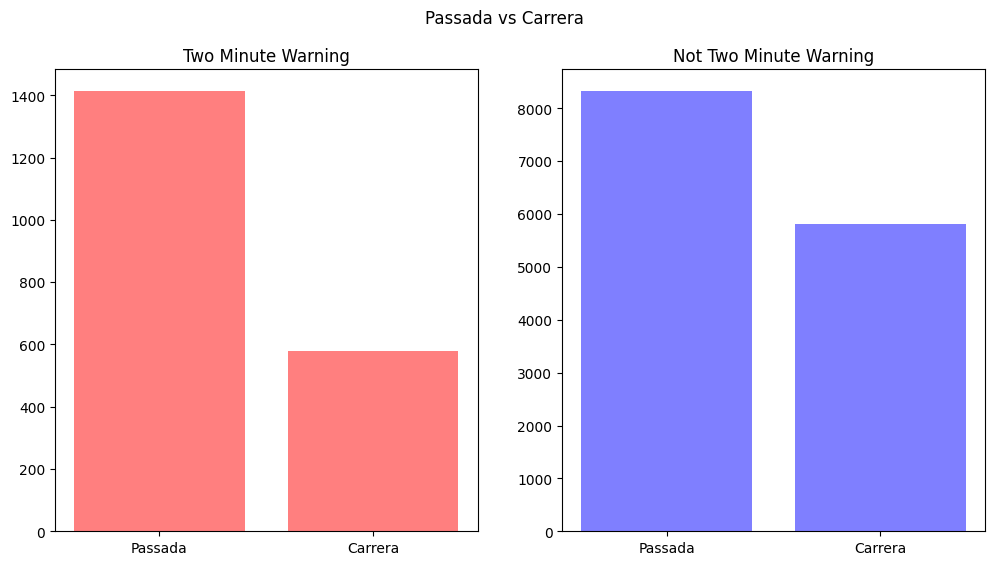

In [30]:
plt.figure(figsize=(12, 6))
plt.suptitle("Passada vs Carrera")
twoMinWarning = plays[plays["isTwoMinuteWarning"] == 1]
plt.subplot(1, 2, 1)
plt.title("Two Minute Warning")
plt.bar(["Passada", "Carrera"], twoMinWarning["Y"].value_counts(), color='red', alpha=0.5)
plt.subplot(1, 2, 2)
plt.title("Not Two Minute Warning")
notTwoMinWarning = plays[plays["isTwoMinuteWarning"] != 1]

plt.bar(["Passada", "Carrera"], notTwoMinWarning["Y"].value_counts(), color='blue', alpha=0.5)
plt.show()

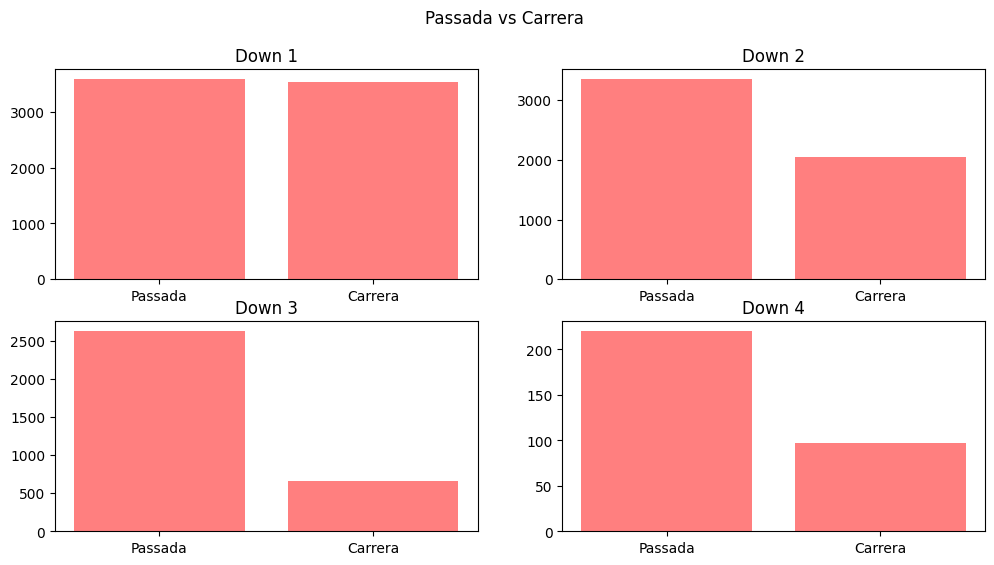

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle("Passada vs Carrera")
for _ in range(1, 5):
    plt.subplot(2, 2, _)
    plt.title(f"Down {_}")
    down = plays[plays["down"] == _]
    plt.bar(["Passada", "Carrera"], down["isDropback"].value_counts(), color='red', alpha=0.5)
plt.show()

## PCA al dataset de Plays

In [ ]:
player_plays.corr().style.background_gradient(cmap='coolwarm', axis=None)

,gameId,playId,nflId,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,isOffense,isDefense,isBall,imc,is_Quarterback,is_RunningBack,is_Receiver,is_TightEnd,is_OffensiveLine,is_DefensiveLine,is_Linebacker,is_DefensiveBack
gameId,1.000000,-0.023372,0.020620,0.024507,0.025673,-0.006980,0.000001,-0.000001,nan,0.002857,0.000368,-0.001844,-0.000868,0.002027,0.000282,-0.000592,0.000088,0.000447
playId,-0.023372,1.000000,0.011278,-0.016830,-0.015803,-0.033571,-0.000002,0.000002,nan,-0.007583,-0.000502,-0.004544,0.003956,-0.001745,0.000587,-0.004489,-0.001670,0.005186
nflId,0.020620,0.011278,1.000000,0.025910,0.012714,0.019713,-0.002585,0.002585,nan,-0.099926,-0.126294,0.031369,0.042881,0.022466,-0.001928,-0.073774,0.012939,0.054339
inMotionAtBallSnap,0.024507,-0.016830,0.025910,1.000000,0.066531,0.654959,nan,nan,nan,-0.171570,-0.064234,0.031200,0.183970,0.065764,-0.182930,nan,-0.000906,nan
shiftSinceLineset,0.025673,-0.015803,0.012714,0.066531,1.000000,0.323339,nan,nan,nan,-0.096120,-0.045189,0.044129,0.041084,0.148279,-0.131612,-0.000352,-0.000861,-0.000352
motionSinceLineset,-0.006980,-0.033571,0.019713,0.654959,0.323339,1.000000,nan,nan,nan,-0.181405,-0.081370,0.100676,0.123102,0.149531,-0.223997,nan,-0.000874,nan
isOffense,0.000001,-0.000002,-0.002585,nan,nan,nan,1.000000,-1.000000,nan,0.190443,0.218862,0.232035,0.361189,0.250824,0.544336,-0.405738,-0.401231,-0.530964
isDefense,-0.000001,0.000002,0.002585,nan,nan,nan,-1.000000,1.000000,nan,-0.190443,-0.218862,-0.232035,-0.361189,-0.250824,-0.544336,0.405738,0.401231,0.530964
isBall,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
imc,0.002857,-0.007583,-0.099926,-0.171570,-0.096120,-0.181405,0.190443,-0.190443,nan,1.000000,-0.175651,-0.049378,-0.371440,-0.080117,0.667652,0.388393,-0.060805,-0.505808


In [8]:
plays.corr().style.background_gradient(cmap='coolwarm', axis=None)

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,playClockAtSnap,gameClockInSecs,halfClockInSecs,isTwoMinuteWarning,Y
gameId,1.000000,-0.023373,-0.015922,0.000093,0.001574,0.001763,0.014241,-0.011134,0.000958,-0.000958,0.005315,0.020570,-0.016752,-0.012897,0.000921,-0.022224
playId,-0.023373,1.000000,0.958970,0.031801,0.008137,0.003090,0.714950,0.721337,-0.028165,0.028165,-0.013118,0.070380,0.987753,0.500910,0.220500,0.013168
quarter,-0.015922,0.958970,1.000000,0.029062,0.000581,-0.000069,0.692313,0.666326,0.003261,-0.003261,-0.008628,0.041158,0.967021,0.415345,0.092859,-0.003513
down,0.000093,0.031801,0.029062,1.000000,-0.361761,0.005717,0.000299,0.009611,-0.007918,0.007918,-0.201407,-0.187447,0.035212,0.021037,0.016406,0.224039
yardsToGo,0.001574,0.008137,0.000581,-0.361761,1.000000,0.077999,0.007768,0.009588,-0.001854,0.001854,-0.256126,-0.040001,0.000500,0.007787,0.021243,0.114515
yardlineNumber,0.001763,0.003090,-0.000069,0.005717,0.077999,1.000000,0.016961,0.024889,-0.001990,0.001990,-0.188329,0.035139,-0.005521,-0.021366,-0.005652,0.045002
preSnapHomeScore,0.014241,0.714950,0.692313,0.000299,0.007768,0.016961,1.000000,0.506756,0.414143,-0.414143,-0.030602,0.020451,0.712906,0.359242,0.165128,-0.004751
preSnapVisitorScore,-0.011134,0.721337,0.666326,0.009611,0.009588,0.024889,0.506756,1.000000,-0.438401,0.438401,-0.022181,0.071324,0.687914,0.352456,0.156091,0.011450
preSnapHomeTeamWinProbability,0.000958,-0.028165,0.003261,-0.007918,-0.001854,-0.001990,0.414143,-0.438401,1.000000,-1.000000,-0.006743,-0.048548,0.003478,0.006904,-0.001605,-0.019657
preSnapVisitorTeamWinProbability,-0.000958,0.028165,-0.003261,0.007918,0.001854,0.001990,-0.414143,0.438401,-1.000000,1.000000,0.006743,0.048548,-0.003478,-0.006904,0.001605,0.019657


In [8]:
plays.corr().style \
    .background_gradient(cmap='coolwarm', axis=None) \
    .format("{:.2f}") \
    .set_table_styles(
        [{'selector': 'th.col_heading',
          'props': [('writing-mode', 'vertical-rl'),
                    ('transform', 'rotate(180deg)'),
                    ('white-space', 'nowrap'),
                    ('vertical-align', 'bottom'),
                    ('text-align', 'left'),

                    ('height', '100px')]}]
    )


,gameId,playId,quarter,down,yardsToGo,yardlineNumber,expectedPoints,playClockAtSnap,gameClockInSecs,halfClockInSecs,isTwoMinuteWarning,preSnapPosTeamWP,Y
gameId,1.00,-0.02,-0.02,0.00,0.00,0.00,0.01,0.02,-0.02,-0.01,0.00,-0.00,-0.02
playId,-0.02,1.00,0.96,0.03,0.01,0.00,-0.01,0.07,0.99,0.50,0.22,-0.06,0.01
quarter,-0.02,0.96,1.00,0.03,0.00,-0.00,-0.01,0.04,0.97,0.42,0.09,-0.05,-0.00
down,0.00,0.03,0.03,1.00,-0.36,0.01,-0.20,-0.19,0.04,0.02,0.02,-0.04,0.22
yardsToGo,0.00,0.01,0.00,-0.36,1.00,0.08,-0.26,-0.04,0.00,0.01,0.02,-0.05,0.11
yardlineNumber,0.00,0.00,-0.00,0.01,0.08,1.00,-0.19,0.04,-0.01,-0.02,-0.01,-0.02,0.05
expectedPoints,0.01,-0.01,-0.01,-0.20,-0.26,-0.19,1.00,-0.03,-0.00,-0.03,-0.05,0.12,-0.15
playClockAtSnap,0.02,0.07,0.04,-0.19,-0.04,0.04,-0.03,1.00,0.06,0.09,0.17,-0.12,-0.03
gameClockInSecs,-0.02,0.99,0.97,0.04,0.00,-0.01,-0.00,0.06,1.00,0.54,0.22,-0.05,0.01
halfClockInSecs,-0.01,0.50,0.42,0.02,0.01,-0.02,-0.03,0.09,0.54,1.00,0.51,-0.03,0.06


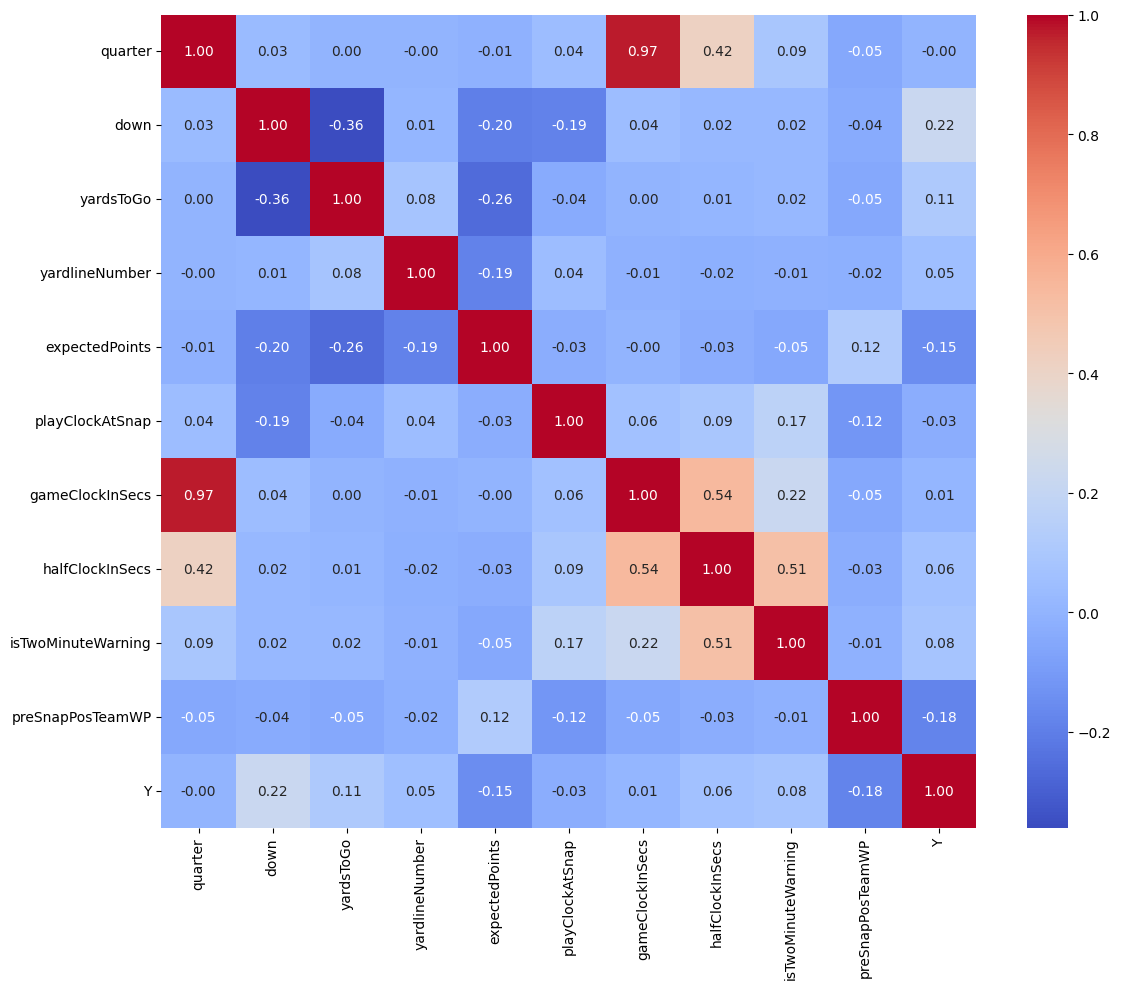

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = plays.drop(columns=['gameId', 'playId']).corr().round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_heatmap.png')
plt.show()


Ens quedem només amb aquelles columnes que no mostrin una forta correlació unes amb les altres

In [12]:
plays_for_pcs = plays.drop(columns=['gameId', 'playId', 'quarter', 'halfClockInSecs', 'isTwoMinuteWarning'])
plays_for_pcs[['Y', "down", "yardsToGo", "yardlineNumber", "preSnapPosTeamWP", "expectedPoints", "playClockAtSnap", "gameClockInSecs"]].corr().style.background_gradient(cmap='coolwarm', axis=None)

,Y,down,yardsToGo,yardlineNumber,preSnapPosTeamWP,expectedPoints,playClockAtSnap,gameClockInSecs
Y,1.000000,0.224039,0.114515,0.045002,-0.177806,-0.150726,-0.031682,0.010800
down,0.224039,1.000000,-0.361761,0.005717,-0.039842,-0.201407,-0.187442,0.035212
yardsToGo,0.114515,-0.361761,1.000000,0.077999,-0.052782,-0.256126,-0.040000,0.000500
yardlineNumber,0.045002,0.005717,0.077999,1.000000,-0.017970,-0.188329,0.035138,-0.005521
preSnapPosTeamWP,-0.177806,-0.039842,-0.052782,-0.017970,1.000000,0.121000,-0.122778,-0.051929
expectedPoints,-0.150726,-0.201407,-0.256126,-0.188329,0.121000,1.000000,-0.026874,-0.003684
playClockAtSnap,-0.031682,-0.187442,-0.040000,0.035138,-0.122778,-0.026874,1.000000,0.055856
gameClockInSecs,0.010800,0.035212,0.000500,-0.005521,-0.051929,-0.003684,0.055856,1.000000


#### PCAs

[0.20532149 0.18852103]
[152.23083086 145.8697772 ]


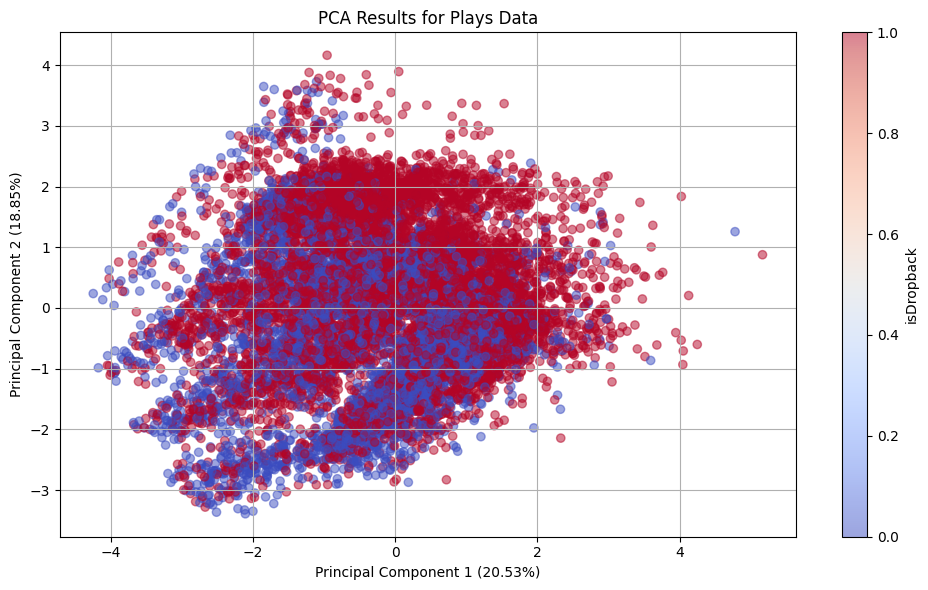

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = plays_for_pcs.drop(columns=['Y'])
y = plays_for_pcs['Y']

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


pca_results = pca.transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, c=y, cmap='coolwarm')
plt.colorbar(label='isDropback')
plt.title('PCA Results for Plays Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../src/images/PCA_Plays.png')
plt.show()

[0.20248837 0.1852051 ]
[151.1769086  144.58122114]


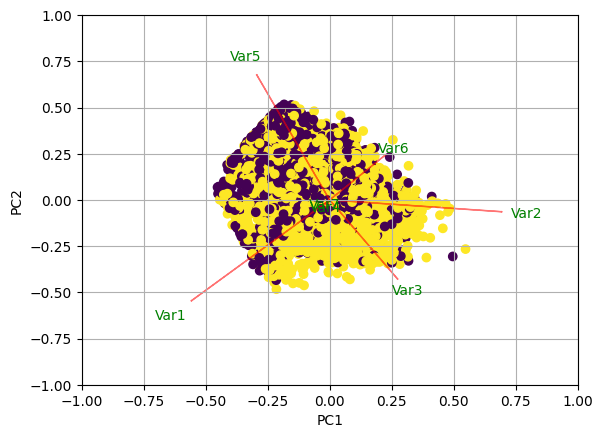

In [ ]:
X = plays_for_pcs.drop(columns=['isDropback'])
y = plays_for_pcs['isDropback']

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA(n_components=2)
x_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(plays.drop(columns=['gameId', 'playId']))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.86040537 0.13938268]
[141874.26311365  57102.67719321]


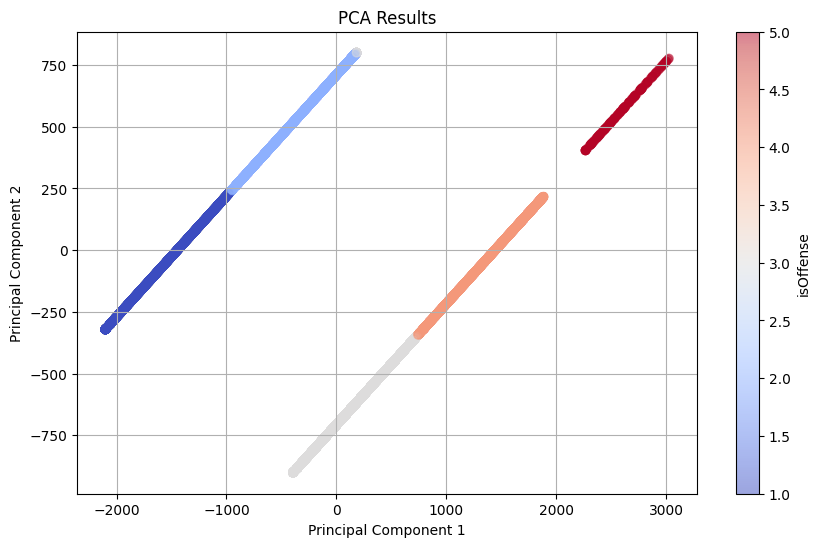

In [ ]:
pca_results = pca.transform(plays.drop(columns=['gameId', 'playId']))

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, c=plays['quarter'], cmap='coolwarm')
plt.colorbar(label='isOffense')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()